<a href="https://colab.research.google.com/github/madan-genai/LangGraph/blob/main/Parallel_Workflows_in_langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langgraph

In [60]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict , Annotated

In [34]:
from inspect import findsource
class BatsmanState(TypedDict):
  runs : int
  balls : int
  fours : int
  sixes : int

  sr : float
  bpb : float
  boundary_percent : float
  summary : str

In [41]:
def calculate_sr(state : BatsmanState) :
  sr = (state["runs"]/state["balls"])*100
  return {"sr":sr}

In [43]:
def calculate_bpb(state : BatsmanState):
  bpb=state["balls"]/(state["fours"] + state["sixes"])
  return {"bpb":bpb}

In [44]:
def calculate_boundary_percent(state : BatsmanState):
  boundary_percent=((state["fours"] * 4) + (state["sixes"] * 6))/(state["runs"])*100
  return {"boundary_percent": boundary_percent}

In [45]:
def calculate_summary(state: BatsmanState):

    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""

    return {'summary': summary}

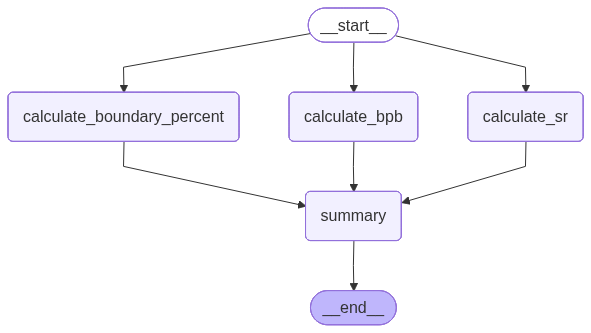

In [46]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', calculate_summary)

# edges

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()
workflow

In [47]:
initial_state = {
    "runs" : 100,
    "balls" : 50,
    "fours" : 6,
    "sixes" : 4
}
workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\nStrike Rate - 200.0 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 48.0\n'}

In [48]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.3 MB/s eta 0:00:00


In [91]:
from langchain_google_genai import ChatGoogleGenerativeAI
from pydantic import BaseModel , Field
import operator

In [122]:
import os
# Please replace 'YOUR_API_KEY' with your actual Gemini API key.
os.environ["GEMINI_API_KEY"]="AIzaSs4PfsjA"

In [123]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
)

In [124]:
class EvaluationSchema(BaseModel):
  feedback : str = Field(description="detailed feedback for the essay")
  score : int = Field(description="score out of 10", ge=0 , le=10)

In [125]:
structured_model = llm.with_structured_output(EvaluationSchema)

In [126]:
essay="""
Role of Pakistan in Artificial Intelligence: Opportunities, Challenges, and Strategic Imperatives

Artificial Intelligence (AI) has emerged as the defining general-purpose technology of the 21st century, reshaping economic productivity, national security doctrines, public administration, and social organization. For developing economies, AI is not merely a technological upgrade but a structural lever capable of accelerating industrial transformation, improving governance efficiency, and enhancing global competitiveness. In this context, Pakistan’s role in AI must be examined through a multidimensional lens encompassing policy formulation, institutional capacity, human capital development, private sector innovation, geopolitical positioning, and ethical governance. Pakistan stands at a strategic inflection point: it possesses a young demographic profile and expanding digital infrastructure, yet it must overcome systemic constraints to translate AI potential into sustainable national advancement.

Global AI Landscape and Pakistan’s Position

Globally, AI leadership is concentrated in technologically advanced states such as the United States and China, supported by massive investments, advanced semiconductor ecosystems, and robust research universities. Emerging economies, including India, have leveraged digital services sectors and strong STEM education pipelines to establish competitive AI ecosystems. Pakistan, though comparatively late in formal AI strategy articulation, has demonstrated increasing recognition of AI as a national priority.

Pakistan’s digital transformation accelerated after the launch of the Pakistan Telecommunication Authority-led broadband expansion initiatives and the broader Digital Pakistan vision. The diffusion of 4G connectivity and rapid smartphone penetration has created a fertile environment for data-driven applications. However, AI development requires more than connectivity; it demands research depth, computational infrastructure, and innovation financing.

Institutional and Policy Framework

Recognizing the transformative potential of AI, the Ministry of Information Technology and Telecommunication initiated consultations for a national AI policy framework. The Higher Education Commission (HEC) has also encouraged AI research through funding and curriculum reforms. Furthermore, institutions such as the National University of Sciences and Technology, Lahore University of Management Sciences, and COMSATS University Islamabad have established AI research labs focusing on machine learning, computer vision, robotics, and natural language processing.

Despite these efforts, Pakistan’s AI policy ecosystem remains in a formative stage. Effective AI governance requires inter-ministerial coordination, regulatory clarity on data protection, cybersecurity resilience, and long-term R&D financing mechanisms. Without coherent strategic planning, isolated institutional efforts may fail to produce systemic impact.

Human Capital: Demographic Dividend and Skill Gap

Pakistan’s population, characterized by a substantial youth bulge, presents a potential demographic dividend. A growing number of students are enrolling in computer science, data science, and related disciplines. Online platforms and open-source ecosystems have democratized AI learning, allowing Pakistani students to compete globally in programming competitions and freelance marketplaces.

However, a quantitative increase in graduates does not automatically translate into qualitative excellence. AI research requires advanced mathematical proficiency, computational thinking, and exposure to frontier problems. Brain drain further complicates the situation; highly skilled AI professionals often migrate to developed countries seeking research funding and professional growth.

To mitigate this challenge, Pakistan must invest in doctoral-level AI research, promote industry-academia collaboration, and create incentives for skilled professionals to remain within the national innovation ecosystem.

AI in Public Sector Transformation

AI has significant potential to enhance governance efficiency in Pakistan. Predictive analytics can optimize tax collection, identify fraud patterns, and improve public financial management. AI-driven decision support systems can strengthen disaster management in a country frequently affected by floods and climate-related catastrophes.

In healthcare, AI-based diagnostic tools can address resource shortages in rural areas by enabling remote medical consultations and image-based disease detection. In agriculture—still a backbone of Pakistan’s economy—AI-powered crop monitoring, yield prediction, and smart irrigation systems can enhance productivity and climate resilience.

The integration of AI into public administration aligns with broader e-governance reforms and can reduce bureaucratic inefficiencies. However, digital transformation must be accompanied by cybersecurity safeguards and data governance frameworks to prevent misuse.

AI and Economic Development

Pakistan’s economy is heavily reliant on traditional sectors such as agriculture, textiles, and remittances. AI offers pathways for diversification and value addition. The country’s expanding IT services industry has already demonstrated export potential through software development and freelancing.

AI startups focusing on fintech, logistics optimization, and e-commerce analytics are emerging in major urban centers such as Karachi, Lahore, and Islamabad. Fintech innovation can promote financial inclusion by leveraging machine learning algorithms for credit scoring and fraud detection, particularly for unbanked populations.

Furthermore, AI-enabled automation can enhance industrial efficiency. Smart manufacturing and predictive maintenance can improve productivity in textile and manufacturing sectors, increasing competitiveness in global markets. However, policymakers must balance automation with employment concerns, ensuring reskilling initiatives accompany technological adoption.

National Security and Strategic Implications

AI has become integral to modern defense systems, including autonomous surveillance, cybersecurity operations, and intelligence analytics. For Pakistan, which operates in a complex regional security environment, AI capabilities hold strategic importance.

Cyber defense mechanisms powered by AI can detect anomalies and mitigate cyber threats in real time. Additionally, AI-driven situational awareness tools can strengthen border management and internal security operations. Nonetheless, ethical constraints and international norms must guide military AI deployment to avoid destabilizing arms races.

Ethical and Regulatory Considerations

AI deployment raises concerns regarding data privacy, algorithmic bias, and surveillance risks. Pakistan currently lacks comprehensive data protection legislation comparable to advanced regulatory frameworks elsewhere. Establishing an independent data protection authority and clear guidelines on AI ethics is essential.

AI systems trained on biased datasets may reinforce socio-economic inequalities. Transparent algorithmic auditing and inclusive dataset design are necessary to prevent discrimination. Moreover, public trust in AI-driven governance depends on accountability and transparency mechanisms.

Challenges Impeding AI Advancement

Pakistan faces several structural constraints:

Limited R&D Funding: AI research requires sustained financial investment.

Computational Infrastructure Gaps: High-performance computing resources remain scarce.

Fragmented Policy Implementation: Coordination between federal and provincial levels is often weak.

Brain Drain: Skilled professionals migrate due to better opportunities abroad.

Energy and Connectivity Issues: Reliable power supply is critical for data centers and AI labs.

Addressing these challenges demands long-term planning and cross-sector collaboration.

Strategic Recommendations

To consolidate its role in AI, Pakistan should adopt the following measures:

Develop a comprehensive national AI strategy with measurable milestones.

Increase public and private investment in AI research and development.

Establish AI innovation hubs and incubators linked to universities.

Promote public-private partnerships for AI commercialization.

Introduce AI literacy programs at secondary and tertiary education levels.

Formulate ethical AI guidelines aligned with international best practices.

Conclusion

Artificial Intelligence represents both an opportunity and a challenge for Pakistan. It offers prospects for economic diversification, governance reform, agricultural modernization, healthcare improvement, and strategic security enhancement. However, the realization of these benefits depends on coherent policymaking, institutional strengthening, human capital investment, and ethical regulation.

Pakistan’s youthful population, expanding digital infrastructure, and growing entrepreneurial ecosystem provide a foundation upon which an AI-driven transformation can be built. The critical question is not whether Pakistan can participate in the AI revolution, but whether it can do so strategically and inclusively. With sustained commitment, interdisciplinary collaboration, and visionary leadership, Pakistan can position itself as a competitive actor in the evolving global AI landscape and harness technology as a catalyst for national development.
"""

In [127]:
prompt=f"Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10 \n {essay}"
structured_model.invoke(prompt)

EvaluationSchema(feedback="The language quality of your essay is exceptionally high. You demonstrate a sophisticated command of academic English, employing a precise and varied vocabulary that effectively conveys complex ideas. The sentence structures are consistently well-formed and varied, contributing to the essay's professional and authoritative tone. The flow of arguments is logical and coherent, with excellent use of transitional phrases and clear topic sentences that guide the reader through each section. There are virtually no grammatical errors, spelling mistakes, or punctuation issues, which speaks to a meticulous attention to detail. This essay is a model of clear, concise, and compelling academic writing.", score=9)

In [128]:
class CSSState(TypedDict):

    essay: str
    language_feedback: str
    analysis_feedback: str
    clarity_feedback: str
    overall_feedback: str
    individual_scores: Annotated[list[int], operator.add]
    avg_score: float

In [129]:
def evaluate_language(state: CSSState):

    prompt = f'Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}'
    output = structured_model.invoke(prompt)

    return {'language_feedback': output.feedback, 'individual_scores': [output.score]}

In [130]:
def evaluate_analysis(state: CSSState):

    prompt = f'Evaluate the depth of analysis of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}'
    output = structured_model.invoke(prompt)

    return {'analysis_feedback': output.feedback, 'individual_scores': [output.score]}

In [131]:
def evaluate_thought(state: CSSState):

    prompt = f'Evaluate the clarity of thought of the following essay and provide a feedback and assign a score out of 10 \n {state["essay"]}'
    output = structured_model.invoke(prompt)

    return {'clarity_feedback': output.feedback, 'individual_scores': [output.score]}

In [132]:
def final_evaluation(state: CSSState):

    # summary feedback
    prompt = f'Based on the following feedbacks create a summarized feedback \n language feedback - {state["language_feedback"]} \n depth of analysis feedback - {state["analysis_feedback"]} \n clarity of thought feedback - {state["clarity_feedback"]}'
    overall_feedback = llm.invoke(prompt).content

    # avg calculate
    avg_score = sum(state['individual_scores'])/len(state['individual_scores'])

    return {'overall_feedback': overall_feedback, 'avg_score': avg_score}


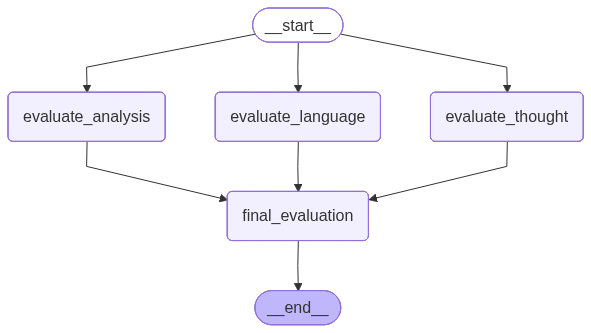

In [134]:
graph = StateGraph(CSSState)

graph.add_node('evaluate_language', evaluate_language)
graph.add_node('evaluate_analysis', evaluate_analysis)
graph.add_node('evaluate_thought', evaluate_thought)
graph.add_node('final_evaluation', final_evaluation)

# edges
graph.add_edge(START, 'evaluate_language')
graph.add_edge(START, 'evaluate_analysis')
graph.add_edge(START, 'evaluate_thought')

graph.add_edge('evaluate_language', 'final_evaluation')
graph.add_edge('evaluate_analysis', 'final_evaluation')
graph.add_edge('evaluate_thought', 'final_evaluation')

graph.add_edge('final_evaluation', END)

workflow = graph.compile()
workflow

In [135]:
essay2 = """India and AI Time

Now world change very fast because new tech call Artificial Intel… something (AI). India also want become big in this AI thing. If work hard, India can go top. But if no careful, India go back.

India have many good. We have smart student, many engine-ear, and good IT peoples. Big company like TCS, Infosys, Wipro already use AI. Government also do program “AI for All”. It want AI in farm, doctor place, school and transport.

In farm, AI help farmer know when to put seed, when rain come, how stop bug. In health, AI help doctor see sick early. In school, AI help student learn good. Government office use AI to find bad people and work fast.

But problem come also. First is many villager no have phone or internet. So AI not help them. Second, many people lose job because AI and machine do work. Poor people get more bad.

One more big problem is privacy. AI need big big data. Who take care? India still make data rule. If no strong rule, AI do bad.

India must all people together – govern, school, company and normal people. We teach AI and make sure AI not bad. Also talk to other country and learn from them.

If India use AI good way, we become strong, help poor and make better life. But if only rich use AI, and poor no get, then big bad thing happen.

So, in short, AI time in India have many hope and many danger. We must go right road. AI must help all people, not only some. Then India grow big and world say "good job India"."""

In [136]:
initial_state = {
    "essay":essay2
}
workflow.invoke(initial_state)


{'essay': 'India and AI Time\n\nNow world change very fast because new tech call Artificial Intel… something (AI). India also want become big in this AI thing. If work hard, India can go top. But if no careful, India go back.\n\nIndia have many good. We have smart student, many engine-ear, and good IT peoples. Big company like TCS, Infosys, Wipro already use AI. Government also do program “AI for All”. It want AI in farm, doctor place, school and transport.\n\nIn farm, AI help farmer know when to put seed, when rain come, how stop bug. In health, AI help doctor see sick early. In school, AI help student learn good. Government office use AI to find bad people and work fast.\n\nBut problem come also. First is many villager no have phone or internet. So AI not help them. Second, many people lose job because AI and machine do work. Poor people get more bad.\n\nOne more big problem is privacy. AI need big big data. Who take care? India still make data rule. If no strong rule, AI do bad.\n\n